In [1]:
from rmgpy.molecule.molecule import Molecule
from rmgpy.molecule.resonance import *

import time

In [2]:
mol1 = Molecule(SMILES="C1=C([CH2])C2=CC=C3C=CC=C4C=CC(=C1)C2=C43")

t0 = time.time()
out1 = generateResonanceIsomers(mol1)
t1 = time.time()

print t1 - t0, len(out1)

0.386253118515 17


multiplicity 2
1  C u0 p0 c0 {2,D} {3,S} {6,S}
2  C u0 p0 c0 {1,D} {4,S} {5,S}
3  C u0 p0 c0 {1,S} {7,S} {9,D}
4  C u0 p0 c0 {2,S} {10,D} {11,S}
5  C u0 p0 c0 {2,S} {12,D} {13,S}
6  C u0 p0 c0 {1,S} {14,S} {15,D}
7  C u0 p0 c0 {3,S} {8,D} {17,S}
8  C u0 p0 c0 {7,D} {15,S} {18,S}
9  C u0 p0 c0 {3,D} {10,S} {19,S}
10 C u0 p0 c0 {4,D} {9,S} {20,S}
11 C u0 p0 c0 {4,S} {16,D} {21,S}
12 C u0 p0 c0 {5,D} {16,S} {23,S}
13 C u0 p0 c0 {5,S} {14,D} {24,S}
14 C u0 p0 c0 {6,S} {13,D} {25,S}
15 C u0 p0 c0 {6,D} {8,S} {26,S}
16 C u0 p0 c0 {11,D} {12,S} {22,S}
17 C u1 p0 c0 {7,S} {27,S} {28,S}
18 H u0 p0 c0 {8,S}
19 H u0 p0 c0 {9,S}
20 H u0 p0 c0 {10,S}
21 H u0 p0 c0 {11,S}
22 H u0 p0 c0 {16,S}
23 H u0 p0 c0 {12,S}
24 H u0 p0 c0 {13,S}
25 H u0 p0 c0 {14,S}
26 H u0 p0 c0 {15,S}
27 H u0 p0 c0 {17,S}
28 H u0 p0 c0 {17,S}



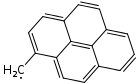

In [3]:
n = 0
print out1[n].toAdjacencyList()
out1[n]

In [3]:
mol2 = Molecule(SMILES="[CH2]C1=CC=CC2C3=CC=CC=C3C=CC=21")

t0 = time.time()
out2 = generateResonanceIsomers(mol2)
t1 = time.time()

print t1 - t0, len(out2)

 0.203773021698 26


multiplicity 2
1  C u0 p0 c0 {2,S} {3,S} {7,D}
2  C u0 p0 c0 {1,S} {4,S} {8,D}
3  C u0 p0 c0 {1,S} {5,S} {11,D}
4  C u0 p0 c0 {2,S} {9,S} {10,D}
5  C u0 p0 c0 {3,S} {6,S} {15,D}
6  C u0 p0 c0 {5,S} {12,D} {16,S}
7  C u0 p0 c0 {1,D} {12,S} {17,S}
8  C u0 p0 c0 {2,D} {13,S} {18,S}
9  C u0 p0 c0 {4,S} {14,D} {19,S}
10 C u0 p0 c0 {4,D} {11,S} {20,S}
11 C u0 p0 c0 {3,D} {10,S} {21,S}
12 C u0 p0 c0 {6,D} {7,S} {22,S}
13 C u1 p0 c0 {8,S} {14,S} {23,S}
14 C u0 p0 c0 {9,D} {13,S} {24,S}
15 C u0 p0 c0 {5,D} {25,S} {26,S}
16 H u0 p0 c0 {6,S}
17 H u0 p0 c0 {7,S}
18 H u0 p0 c0 {8,S}
19 H u0 p0 c0 {9,S}
20 H u0 p0 c0 {10,S}
21 H u0 p0 c0 {11,S}
22 H u0 p0 c0 {12,S}
23 H u0 p0 c0 {13,S}
24 H u0 p0 c0 {14,S}
25 H u0 p0 c0 {15,S}
26 H u0 p0 c0 {15,S}



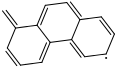

In [39]:
n = 8
print out2[n].toAdjacencyList()
out2[n]

In [26]:
from rmgpy.molecule.resonance import __generateResonanceStructures
__generateResonanceStructures([mol2],[generateAdjacentResonanceIsomers])

[Molecule(SMILES="[CH2]C1=CC=CC2C3=CC=CC=C3C=CC=21"),
 Molecule(SMILES="C=C1[CH]C=CC2C3=CC=CC=C3C=CC=21"),
 Molecule(SMILES="C=C1C=C[CH]C2C3=CC=CC=C3C=CC=21"),
 Molecule(SMILES="C=C1C=CC=C2[C]1C=CC1=CC=CC=C12"),
 Molecule(SMILES="[CH2]C1C=CC=C2C3=CC=CC=C3C=CC=12"),
 Molecule(SMILES="C=C1C=CC=C2C1=C[CH]C1=CC=CC=C12"),
 Molecule(SMILES="C=C1C=CC=C2C1=CC=C1[CH]C=CC=C12"),
 Molecule(SMILES="C=C1C=CC=C2C1=CC=C1C=C[CH]C=C12"),
 Molecule(SMILES="C=C1C=CC=C2[C]3C=CC=CC3=CC=C12"),
 Molecule(SMILES="C=C1C=C[CH]C2C1=CC=C1C=CC=CC=21"),
 Molecule(SMILES="C=C1C=CC=C2C1=C[CH]C1C=CC=CC=12"),
 Molecule(SMILES="C=C1[CH]C=CC2C1=CC=C1C=CC=CC=21"),
 Molecule(SMILES="C=C1C=CC=C2[C]1C=CC1C=CC=CC=12"),
 Molecule(SMILES="[CH2]C1=CC=CC2C1=CC=C1C=CC=CC=21"),
 Molecule(SMILES="[CH2]C1C=CC=C2C=1C=CC1C=CC=CC=12"),
 Molecule(SMILES="C=C1C=C[CH]C2C3C=CC=CC=3C=CC=21"),
 Molecule(SMILES="C=C1[CH]C=CC2C3C=CC=CC=3C=CC=21"),
 Molecule(SMILES="[CH2]C1=CC=CC2C3C=CC=CC=3C=CC=21")]

In [2]:
mol3 = Molecule(SMILES="C=C1C=CC=CC1=C")

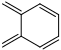

In [4]:
generateClarStructures(mol3)[0]

In [4]:
SSSR = mol3.getAromaticSSSR()

atoms = set()
for ring in SSSR:
    atoms.update(ring)
atoms = list(atoms)

bonds = set()
for atom in atoms:
    bonds.update([atom.bonds[key] for key in atom.bonds.keys() if key.isNonHydrogen()])
bonds = list(bonds)

In [5]:
atoms

[<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>]

In [6]:
bonds

[<Bond "D">,
 <Bond "D">,
 <Bond "S">,
 <Bond "D">,
 <Bond "D">,
 <Bond "S">,
 <Bond "S">,
 <Bond "S">]

In [7]:
a = []
for atom in atoms:
    inRing = [1 if atom in ring else 0 for ring in SSSR]
    inBond = [1 if atom in [bond.atom1, bond.atom2] else 0 for bond in bonds]
    a += (inRing + inBond) # Intentionally created as 1D list
print a

[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]


In [10]:
len([])

0

In [2]:
molList = generateResonanceIsomers(Molecule(SMILES="c1ccccc1[C]=C"))

In [2]:
molList = generateResonanceIsomers(Molecule(SMILES="c12[c]cccc1cccc2"))

In [10]:
generateResonanceIsomers(Molecule().fromAdjacencyList(molList[1].toAdjacencyList()))

[Molecule(SMILES="[c]1cccc2ccccc12"),
 Molecule(SMILES="[c]1cccc2C=CC=Cc12"),
 Molecule(SMILES="[C]1=CC=Cc2ccccc21")]

In [1]:
from unittest import *
import sys
import rmgpy.molecule.resonanceTest
tests = TestLoader().loadTestsFromModule(rmgpy.molecule.resonanceTest)
TextTestRunner(verbosity=2, stream=sys.stdout).run(tests)

testClarTransformation (rmgpy.molecule.resonanceTest.ClarTest)
Test that clarTransformation generates an aromatic ring. ... ok
testCorannulene (rmgpy.molecule.resonanceTest.ClarTest)
Test that we generate 5 Clar structures for corannulene ... ok
testPhenalene (rmgpy.molecule.resonanceTest.ClarTest)
Test that we generate 2 Clar structures for phenalene. ... ok
testPhenanthrene (rmgpy.molecule.resonanceTest.ClarTest)
Test that we generate 1 Clar structure for phenanthrene. ... ok
testAllylShift (rmgpy.molecule.resonanceTest.ResonanceTest)
Test allyl shift for hexadienyl radical ... ok
testAzide (rmgpy.molecule.resonanceTest.ResonanceTest)
Test resonance structure generation for ethyl azide ... ok
testFusedAromatic1 (rmgpy.molecule.resonanceTest.ResonanceTest)
Test we can make aromatic perylene from both adjlist and SMILES ... ok
testFusedAromatic2 (rmgpy.molecule.resonanceTest.ResonanceTest)
Test we can make aromatic naphthalene from both adjlist and SMILES ... ok
testFusedAromatic3 (rmg

<unittest.runner.TextTestResult run=24 errors=0 failures=0>